In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

## Data Importing
Here, we import issuance screens, which contain summary info for the top 1000 most recently issued Auto, Card, and Consumer ABS securities. 

In [3]:
# directory: str = 'C:/Users/bishj/OneDrive/College Notebook/Boston University/Fall Senior Year/CS 506/Project/CS506-Fall2020-Projects/consumer_abs'
directory: str = 'D:/OneDrive/College Notebook/Boston University/Fall Senior Year/CS 506/Project/CS506-Fall2020-Projects/consumer_abs'
data_directory: str = directory + '/data'


In [356]:
## STUDENT IS MESSED UP CURRENTLY 
issuanceScreens: list = ['AUTO', 'CARD']
issuanceDataFrames: dict = {}
    
for i in issuanceScreens:
    df: pd.DataFrame = pd.read_excel(data_directory + f"/{i}_ABS_ISSUANCE.xlsx")
    df['Issue Date'] = pd.to_datetime(df['Issue Date'])    
    
    issuanceDataFrames[f"{i}_ABS_ISSUANCE"] = df

In [5]:
issuanceDataFrames['AUTO_ABS_ISSUANCE']

,Issuer Name,CUSIP,Security Name,Mortgage Original Amount,Cpn,Is Floater,Is Mortgage Paid Off,TRACE Eligible,Issue Date,Maturity,Moody Rtg,Num of Loans,Number of Pools/Loans,Amt Out,Average Original Loan Size,Coupon Type
0,Hertz Vehicle Financing II LP,42806DBQ1,HERTZ 2018-1A A,764020000.0,3.29,N,N,Y,2018-01-24,2/25/2024,Baa3 *+,1,1.0,2.981603e+08,1.058200e+09,FIXED
1,Hertz Vehicle Financing II LP,42806DCD9,HERTZ 2019-1A A,538142000.0,3.71,N,N,Y,2019-02-06,3/25/2023,Baa3 *+,1,1.0,2.103895e+08,7.453030e+08,FIXED
2,Hertz Vehicle Financing II LP,42806DCN7,HERTZ 2019-3A A,576350000.0,2.67,N,N,Y,2019-11-26,12/26/2025,Baa3 *+,1,1.0,2.228799e+08,7.996890e+08,FIXED
3,GMF Floorplan Owner Revolving Trust,361886CH5,GFORT 2020-1 A,548500000.0,0.68,N,N,Y,2020-09-16,8/15/2025,Aaa,NaN,NaN,5.485000e+08,NaN,FIXED
4,Hertz Vehicle Financing II LP,42806DAH2,HERTZ 2015-3A A,265265000.0,2.67,N,N,Y,2015-10-07,9/25/2021,Baa3 *+,1,1.0,1.012522e+08,3.711560e+08,FIXED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,Avis Budget Rental Car Funding AESOP LLC,05377RBJ2,AESOP 2012-3A C,33300000.0,4.23,N,Y,N,2013-09-09,3/20/2019,WR,1,1.0,0.000000e+00,7.230000e+08,FIXED
2436,Avis Budget Rental Car Funding AESOP LLC,05377RBM5,AESOP 2013-1A C,35700000.0,4.42,N,Y,N,2013-09-09,9/20/2019,NaN,0,0.0,0.000000e+00,NaN,FIXED
2437,Capital One Prime Auto Receivables Trust 2019-2,BCC2LARU5,COPAR 2019-2 B,14108000.0,2.16,N,N,N,2019-09-18,3/17/2025,NaN,1,1.0,1.410800e+07,1.410746e+09,FIXED
2438,Capital One Prime Auto Receivables Trust 2019-2,BCC2LARW1,COPAR 2019-2 D,14108000.0,2.69,N,N,N,2019-09-18,1/15/2026,NaN,1,1.0,1.410800e+07,1.410746e+09,FIXED


In [357]:
issuanceDF: pd.DataFrame = pd.concat([issuanceDataFrames[i] for i in issuanceDataFrames])
issuanceDF.reset_index(inplace=True)
issuanceDF.drop('index', inplace=True, axis=1)
issuanceDF.head(10)

,Issuer Name,CUSIP,Security Name,Mortgage Original Amount,Cpn,Is Floater,Is Mortgage Paid Off,TRACE Eligible,Issue Date,Maturity,Moody Rtg,Num of Loans,Number of Pools/Loans,Amt Out,Average Original Loan Size,Coupon Type
0,Hertz Vehicle Financing II LP,42806DBQ1,HERTZ 2018-1A A,764020000.0,3.29,N,N,Y,2018-01-24,2/25/2024,Baa3 *+,1,1.0,2.981603e+08,1.058200e+09,FIXED
1,Hertz Vehicle Financing II LP,42806DCD9,HERTZ 2019-1A A,538142000.0,3.71,N,N,Y,2019-02-06,3/25/2023,Baa3 *+,1,1.0,2.103895e+08,7.453030e+08,FIXED
2,Hertz Vehicle Financing II LP,42806DCN7,HERTZ 2019-3A A,576350000.0,2.67,N,N,Y,2019-11-26,12/26/2025,Baa3 *+,1,1.0,2.228799e+08,7.996890e+08,FIXED
3,GMF Floorplan Owner Revolving Trust,361886CH5,GFORT 2020-1 A,548500000.0,0.68,N,N,Y,2020-09-16,8/15/2025,Aaa,NaN,NaN,5.485000e+08,NaN,FIXED
4,Hertz Vehicle Financing II LP,42806DAH2,HERTZ 2015-3A A,265265000.0,2.67,N,N,Y,2015-10-07,9/25/2021,Baa3 *+,1,1.0,1.012522e+08,3.711560e+08,FIXED
5,Carmax Auto Owner Trust 2019-3,14315PAD7,CARMX 2019-3 A3,486100000.0,2.18,N,N,Y,2019-07-30,8/15/2024,NaN,1,1.0,4.861000e+08,1.503760e+09,FIXED
6,Tesla Auto Lease Trust 2018-B,88161NAA7,TESLA 2018-B A,673680000.0,3.71,N,N,Y,2018-12-19,8/20/2021,Aaa,1,1.0,3.507126e+08,9.197061e+08,FIXED
7,Hertz Vehicle Financing II LP,42806DCH0,HERTZ 2019-2A A,576525000.0,3.42,N,N,Y,2019-05-29,5/25/2025,Baa3 *+,1,1.0,2.252390e+08,7.985100e+08,FIXED
8,Drive Auto Receivables Trust 2019-1,26208NAF1,DRIVE 2019-1 C,164470000.0,3.78,N,N,Y,2019-01-23,4/15/2025,Aaa,1,1.0,1.644700e+08,1.284911e+09,FIXED
9,Hertz Vehicle Financing II LP,428040CU1,HERTZ 2017-1A A,324900000.0,2.96,N,N,Y,2017-09-20,10/25/2021,Baa3 *+,1,1.0,1.268500e+08,4.500000e+08,FIXED


## Mean Issuance by Year
From the chart below, it's clear that the average size of card ABS is increasing. Auto is reamining flat, and consumer is falling but that's most likely a data issue since the "consumer" category is being narrowed.

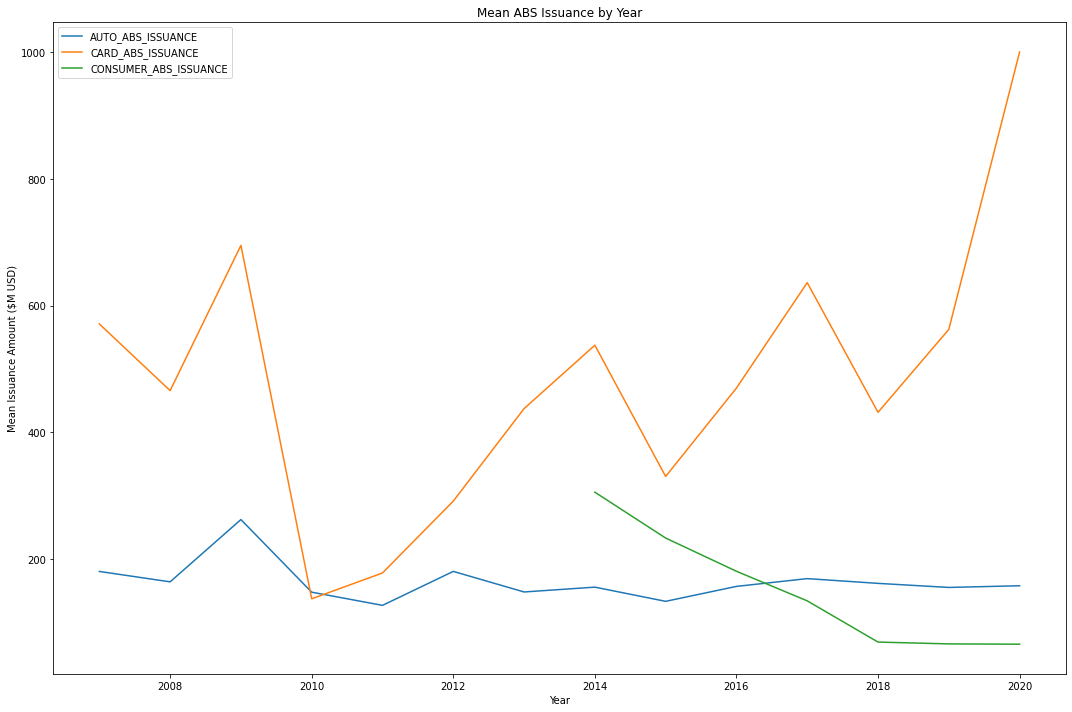

In [272]:
fig = plt.figure(figsize=(15,10))

for i in issuanceDataFrames:
    mean_issuance_by_year=issuanceDataFrames[i].groupby(issuanceDataFrames[i]['Issue Date'].map(lambda x: x.year)).mean()
    amount_in_millions=mean_issuance_by_year['Mortgage Original Amount']/1e6
    
    plt.plot(mean_issuance_by_year.index, amount_in_millions, label = i)
    
plt.legend()
plt.title('Mean ABS Issuance by Year')
plt.ylabel('Mean Issuance Amount ($M USD)')
plt.xlabel("Year")
plt.tight_layout()
_=plt.show()

## Security Finder Data
This data contains the top 1000 most recent ABS and is filtered by subsector, cash flow (whether or not the security is still generating cashflows), and the coupon type (broadly 4 categories).

In [278]:
SUBSECTORS: list=['AUTO', 'CARD']
CFs: list=['Y', 'PD']
TYPES: list=['FLT', 'SUB', 'SEQ', 'SB']

SECF_Dict: dict = {}

for i in SUBSECTORS:
    for j in CFs:
        for k in TYPES:
            if (i=='AUTO') & (j=='Y') & (k=='SB'):
                continue
            else:

                df: pd.DataFrame=pd.read_excel(data_directory+f"/{i}_ABS_{j}_{k}.xlsx")

                SECF_Dict[f"{i}_{j}_{k}"]=df


In [313]:
SECF_DF: pd.DataFrame = pd.concat([SECF_Dict[i] for i in SECF_Dict])
SECF_DF=SECF_DF[SECF_DF.Ticker!='#N/A Review']
SECF_DF.reset_index(inplace=True)
SECF_DF.drop('index', inplace=True, axis=1)

In [314]:
# Since each dataframe is just top 1000 from Bloomberg, we need to make sure we don't have overrepresentation of any type of issuance
SECF_DF['Issued']=pd.to_datetime(SECF_DF['Issued'])
SECF_DF.head(10)

,CF,Ticker,Series,Class,Coupon,Maturity,Original Amount,Factor,Private,Type,Country,Currency,Issued,Sub Sector,SSA
0,Y,GMALT,2020-3,A2B,0.56638,11/21/2022,50000000,1,N,FLT,US,USD,2020-09-29,AUTO 6.8,NaN
1,Y,FORDF,2020-1,A2,0.64838,9/15/2025,150000000,1,N,FLT,US,USD,2020-09-18,AUTO 0,NaN
2,Y,FORDL,2020-B,A2B,0.40838,12/15/2022,100000000,1,N,FLT,US,USD,2020-07-24,AUTO 5.6,NaN
3,Y,AMCAR,2020-2,A2B,0.49725,12/18/2023,50000000,1,N,FLT,US,USD,2020-07-22,AUTO 11.9,NaN
4,Y,CARMX,2020-3,A2B,0.39838,6/15/2023,50000000,1,N,FLT,US,USD,2020-07-22,AUTO 6.8,NaN
5,Y,SDART,2020-2,A2B,0.49838,5/15/2023,75000000,1,N,FLT,US,USD,2020-07-22,AUTO 11.8,NaN
6,Y,NAROT,2020-B,A2B,0.32838,10/17/2022,50000000,1,N,FLT,US,USD,2020-06-30,AUTO 3.2,NaN
7,Y,WLAKE,2020-2X,A2B,0.77838,2/15/2024,50000000,1,N,FLT,US,USD,2020-06-23,AUTO 19.5,NaN
8,Y,DRIVE,2020-2,A2B,0.67838,7/17/2023,65000000,0.865195,N,FLT,US,USD,2020-06-17,AUTO 18.9,NaN
9,Y,GMALT,2020-2,A2B,0.55138,10/20/2022,60000000,1,N,FLT,US,USD,2020-06-17,AUTO 6.8,NaN


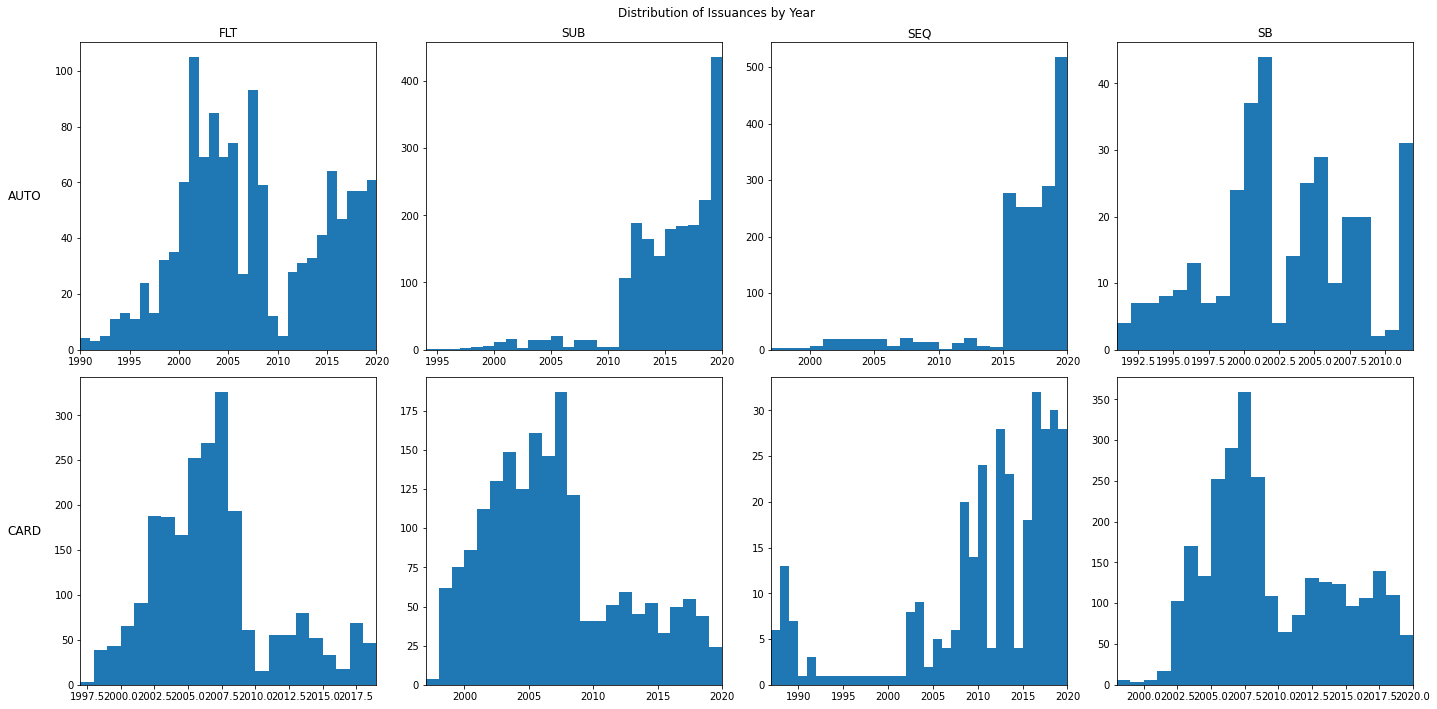

In [317]:
fig, axes = plt.subplots(nrows=len(SUBSECTORS), ncols=len(TYPES), figsize=(20,10))

for j, i in enumerate(SUBSECTORS):
    for l, k in enumerate(TYPES):
        # ax[i, j].plot(SECF_DF[SECF_DF['Sub Sector'].str.contains(i) and SECF_DF['Type']==k].groupby(SECF_DF['Issued'].dt.year).count()['Issued'])
        df=SECF_DF[(SECF_DF['Sub Sector'].str.contains(i)) & (SECF_DF['Type'].str.contains(k))]['Issued'].dt.year
        axes[j,l].hist(df, bins=np.unique(df), density=False, )
        axes[j,l].margins(x=0)
        
pad=5
for ax, col in zip(axes[0], TYPES):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], SUBSECTORS):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
    
fig.suptitle('Distribution of Issuances by Year')
fig.tight_layout()        

In [318]:
# Choose 2000 since CARD issuances before 2000 are scarce 
SECF_DF=SECF_DF.where(SECF_DF['Issued'].dt.year >= 2000)

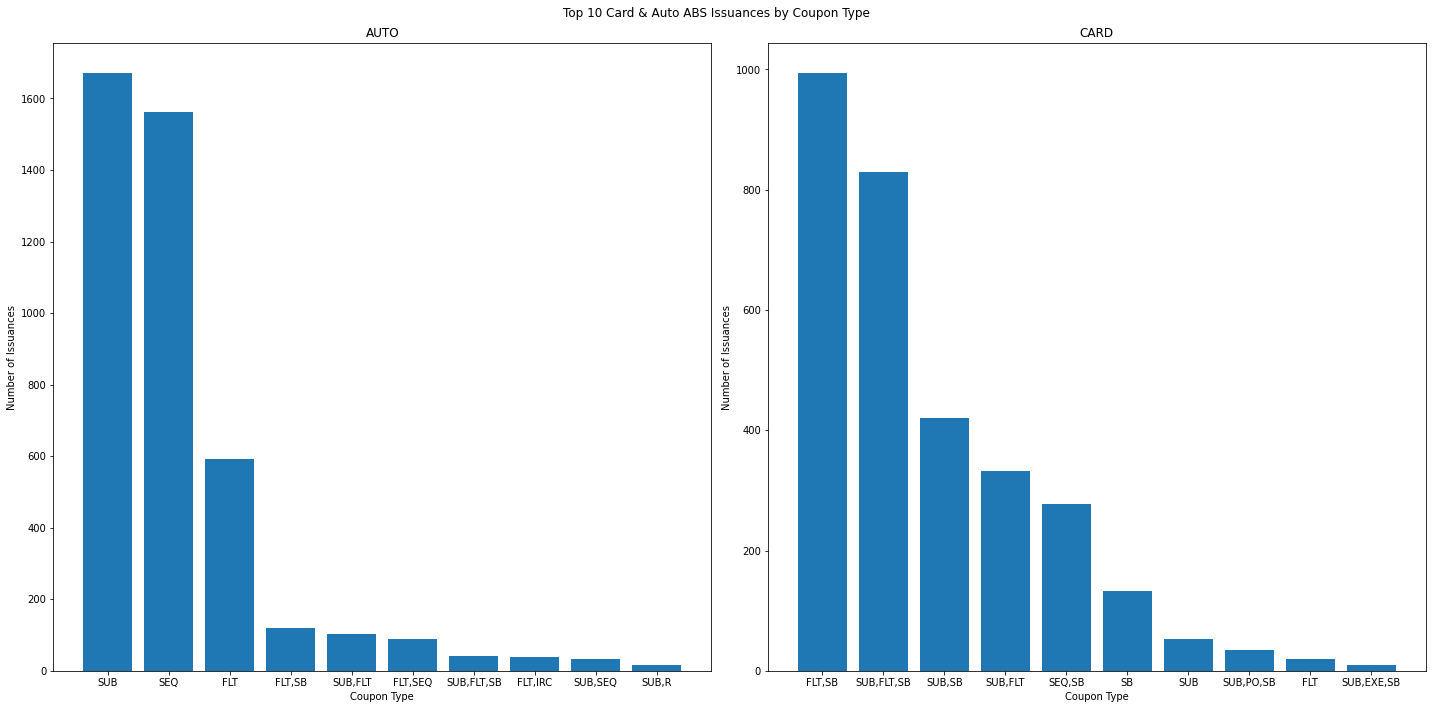

In [319]:
fig, axes = plt.subplots(ncols=len(SUBSECTORS), figsize=(20,10))

for j,i in enumerate(SUBSECTORS):
    axes[j].bar(SECF_DF[SECF_DF['Sub Sector'].str.contains(i, na=False)].Type.value_counts().index[:10], SECF_DF[SECF_DF['Sub Sector'].str.contains(i, na=False)].Type.value_counts()[:10])
    axes[j].set_xlabel('Coupon Type')
    axes[j].set_ylabel('Number of Issuances')
    
    axes[j].set_title(i)
    
fig.suptitle('Top 10 Card & Auto ABS Issuances by Coupon Type')


plt.tight_layout()

## Heatmaps
The following heatmaps show the number of issuances by coupon type and the average dollar amount by coupon type. The limitation of these heatmaps is that each intersection contains only 2 dimensions, i.e. the total number or average dollar amount of a security with 3 coupon categorizations won't be represented in its entirety. This being the case, it seemed more useful to condense into the 4 main categories of coupon type: Floating, Soft Bullet, Subordinated, and Sequential.

In [320]:
arr=[i.split(',') for i in SECF_DF['Type'].dropna().unique()]
unique_types=set(x for l in arr for x in l)
unique_types

{'AFC',
 'ARB',
 'ARS',
 'CAM',
 'CMPLX',
 'CSTR',
 'DLY',
 'EXE',
 'FLT',
 'FTV',
 'IRC',
 'MEZ',
 'OC',
 'PO',
 'PT',
 'R',
 'SB',
 'SC',
 'SEQ',
 'STEP',
 'SUB',
 'TAC',
 'XRESET'}

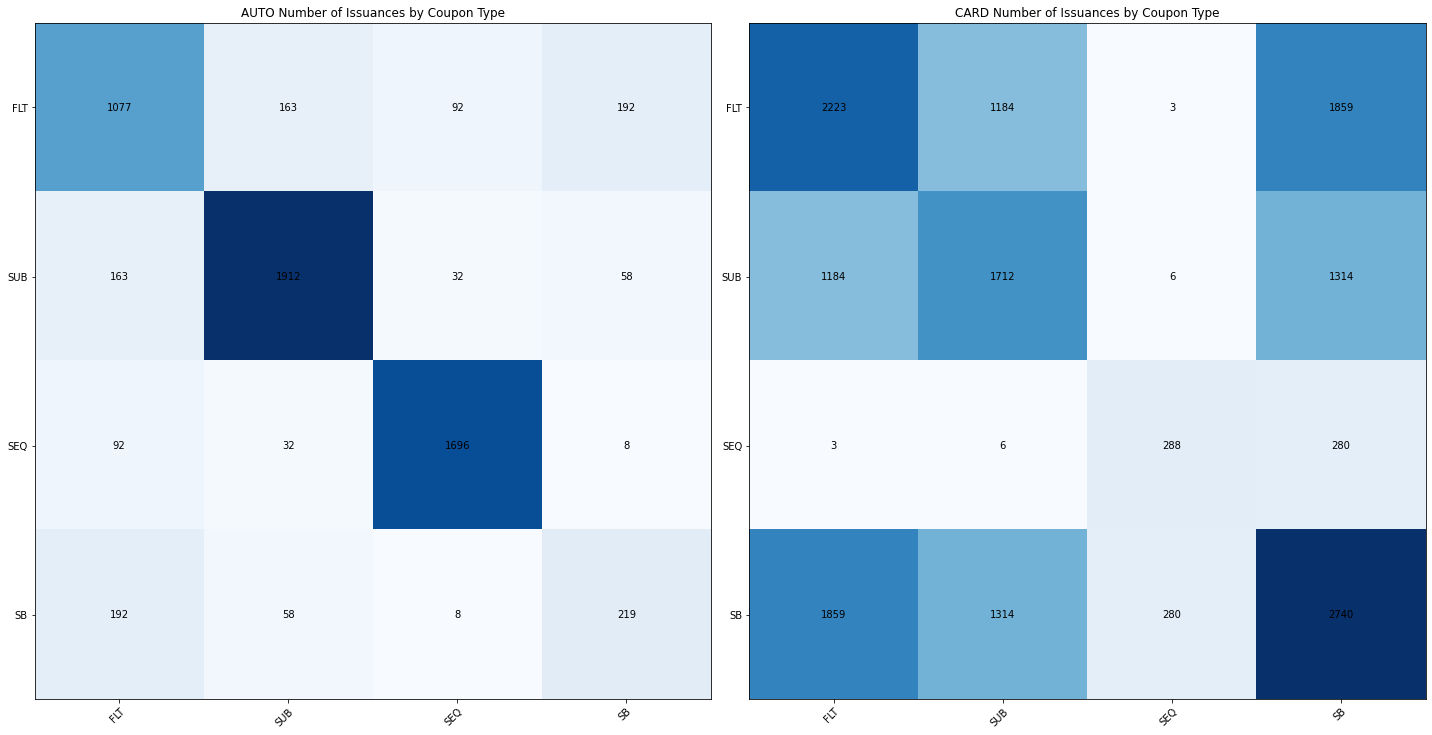

In [321]:
fig, ax = plt.subplots(ncols=2, figsize=(20,15))

cmap=plt.get_cmap('Blues')

for num, subsector in enumerate(SUBSECTORS):
    heatmapData: list = []

    for i in TYPES:
        heatmapData.append([len(SECF_DF[(SECF_DF['Type'].str.contains(i, na=False)) & (SECF_DF['Type'].str.contains(j, na=False)) & (SECF_DF['Sub Sector'].str.contains(subsector, na=False))]) for j in TYPES])

    heatmapData=np.array(heatmapData)
    
    im = ax[num].imshow(heatmapData, cmap=cmap)
    ax[num].set_xticks(np.arange(len(TYPES)))
    ax[num].set_yticks(np.arange(len(TYPES)))

    ax[num].set_xticklabels(TYPES)
    ax[num].set_yticklabels(TYPES)

    plt.setp(ax[num].get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    ax[num].set_title(f"{subsector} Number of Issuances by Coupon Type")

    for i in range(len(TYPES)):
        for j in range(len(TYPES)):
            if heatmapData[i,j]==0:
                text = ax[num].text(j, i, heatmapData[i, j],
                               ha="center", va="center", color="w")

            else:
                 text = ax[num].text(j, i, heatmapData[i, j],
                               ha="center", va="center", color="black")


fig.tight_layout()
plt.show()

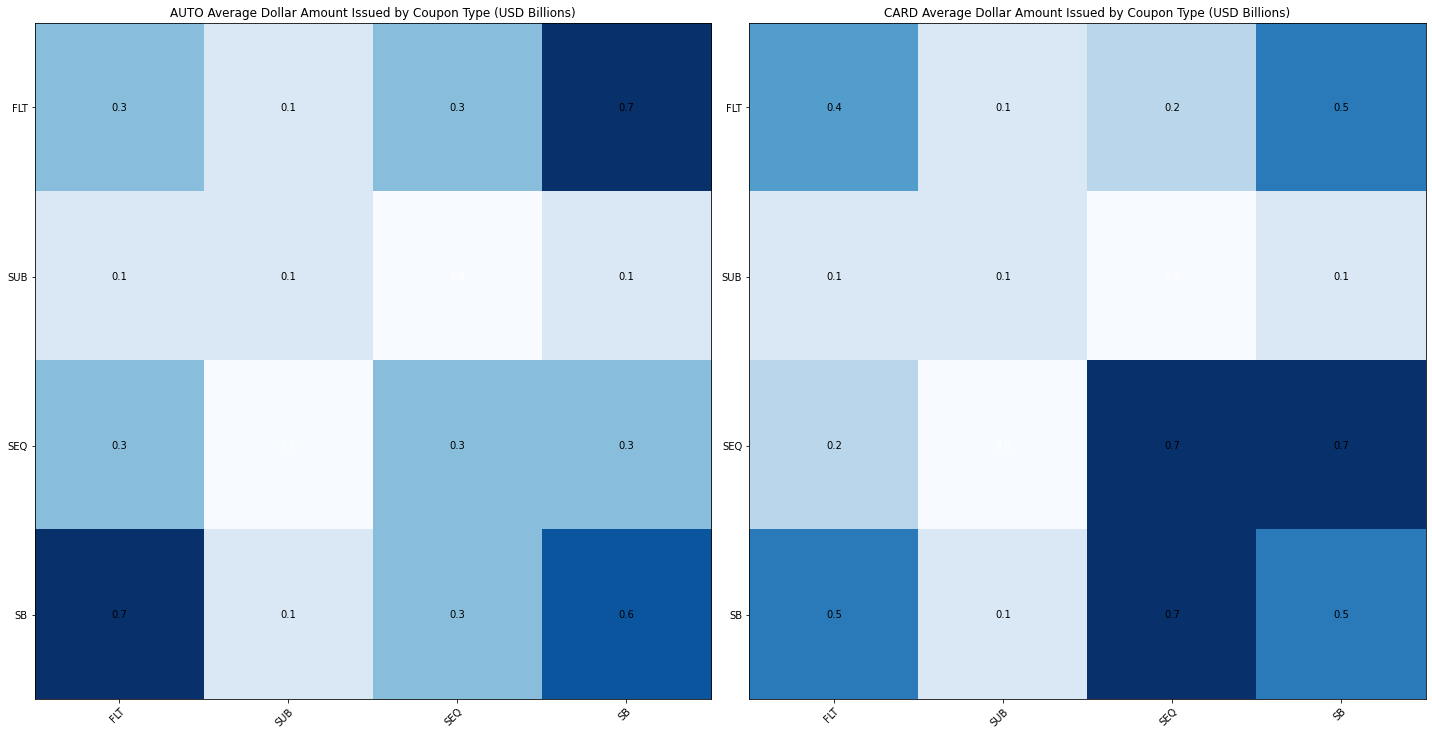

In [322]:
fig, ax = plt.subplots(ncols=2, figsize=(20,15))

cmap=plt.get_cmap('Blues')

for num, subsector in enumerate(SUBSECTORS):
    heatmapData: list = []

    for i in TYPES:
        heatmapData.append([(SECF_DF[(SECF_DF['Type'].str.contains(i, na=False)) & (SECF_DF['Type'].str.contains(j, na=False)) & (SECF_DF['Sub Sector'].str.contains(subsector, na=False))]['Original Amount']).mean() for j in TYPES])

    heatmapData=np.array(heatmapData)
    heatmapData=np.nan_to_num(heatmapData)
    heatmapData=np.round(heatmapData/1e9, 1)
    
    im = ax[num].imshow(heatmapData, cmap=cmap)
    ax[num].set_xticks(np.arange(len(TYPES)))
    ax[num].set_yticks(np.arange(len(TYPES)))

    ax[num].set_xticklabels(TYPES)
    ax[num].set_yticklabels(TYPES)

    plt.setp(ax[num].get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    ax[num].set_title(f"{subsector} Average Dollar Amount Issued by Coupon Type (USD Billions)")

    for i in range(len(TYPES)):
        for j in range(len(TYPES)):
            if heatmapData[i,j]==0:
                text = ax[num].text(j, i, heatmapData[i, j],
                               ha="center", va="center", color="w")

            else:
                 text = ax[num].text(j, i, heatmapData[i, j],
                               ha="center", va="center", color="black")


fig.tight_layout()
plt.show()

## TRACE Eligibility
One of the components of this project is examining how these securities are priced and how that price has changed over the years. In examining issuance amount, collateral risk, etc. we don't want to leave out securities for which pricing data isn't available. However, we also need to see what proportion of securities included in the data do have pricing available, which means we need to see which securities are TRACE eligible. To do so, we cross reference our SRCH and SECF dataframes.

In [411]:
idxs: list = []
    
df1: pd.DataFrame=pd.DataFrame(columns=SECF_DF.columns)
df2: pd.DataFrame=pd.DataFrame(columns=issuanceDF.columns)
for i in range(len(SECF_DF)):
    temp:pd.DataFrame=issuanceDF[(issuanceDF['Security Name']==str(SECF_DF.loc[i]['Ticker']) + " " + str(SECF_DF.loc[i]['Series']) + " " + str(SECF_DF.loc[i]['Class'])) &
                                 (issuanceDF['TRACE Eligible']=='Y')]
    
    if len(temp) > 0:
        idxs.append(i)
        df1=pd.concat([df1, pd.DataFrame(SECF_DF.iloc[i]).T])
        df2=pd.concat([df2, temp])


In [414]:
df3=pd.concat([df1.reset_index(), df2.reset_index().drop('Maturity', axis=1)], axis=1, sort=False)
df3.drop('index', axis=1, inplace=True)
df3['Maturity']=pd.to_datetime(df3['Maturity'])
df3.head(10)

,CF,Ticker,Series,Class,Coupon,Maturity,Original Amount,Factor,Private,Type,...,Is Floater,Is Mortgage Paid Off,TRACE Eligible,Issue Date,Moody Rtg,Num of Loans,Number of Pools/Loans,Amt Out,Average Original Loan Size,Coupon Type
0,Y,FORDF,2020-1,A2,0.64838,2025-09-15,150000000,1,N,FLT,...,Y,N,Y,2020-09-18,Aaa,#N/A Field Not Applicable,NaN,1.500000e+08,NaN,FLOATING
1,Y,FORDL,2020-B,A2B,0.40838,2022-12-15,100000000,1,N,FLT,...,Y,N,Y,2020-07-24,Aaa,1,1.0,1.000000e+08,1.606686e+09,FLOATING
2,Y,AMCAR,2020-2,A2B,0.49725,2023-12-18,50000000,1,N,FLT,...,Y,N,Y,2020-07-22,NaN,1,1.0,5.000000e+07,1.105209e+09,FLOATING
3,Y,CARMX,2020-3,A2B,0.39838,2023-06-15,50000000,1,N,FLT,...,Y,N,Y,2020-07-22,NaN,1,1.0,5.000000e+07,1.358149e+09,FLOATING
4,Y,SDART,2020-2,A2B,0.49838,2023-05-15,75000000,1,N,FLT,...,Y,N,Y,2020-07-22,Aaa,1,1.0,7.500000e+07,1.676631e+09,FLOATING
5,Y,DRIVE,2020-2,A2B,0.67838,2023-07-17,65000000,0.865195,N,FLT,...,Y,N,Y,2020-06-17,Aaa,1,1.0,6.472942e+07,1.271513e+09,FLOATING
6,Y,CARMX,2020-2,A2B,1.44838,2023-01-17,65000000,0.999878,N,FLT,...,Y,N,Y,2020-04-29,NaN,1,1.0,6.500000e+07,1.156942e+09,FLOATING
7,Y,SDART,2020-1,A2B,1.69838,2023-01-17,50000000,0.708549,N,FLT,...,Y,N,Y,2020-04-22,Aaa,1,1.0,4.224071e+07,1.247661e+09,FLOATING
8,Y,AMCAR,2020-1,A2B,0.49725,2023-03-20,70000000,0.841744,N,FLT,...,Y,N,Y,2020-03-11,Aaa,1,1.0,6.585064e+07,9.794211e+08,FLOATING
9,Y,HDMOT,2020-A,A2B,0.29838,2023-01-17,21000000,0.670733,N,FLT,...,Y,N,Y,2020-01-29,Aaa,1,1.0,1.597490e+07,5.801987e+08,FLOATING


In [566]:
traceIssuances.columns

Index(['CF', 'Ticker', 'Series', 'Class', 'Coupon', 'Maturity',
       'Original Amount', 'Factor', 'Private', 'Type', 'Country', 'Currency',
       'Issued', 'Sub Sector', 'SSA', 'Issuer Name', 'CUSIP', 'Security Name',
       'Mortgage Original Amount', 'Cpn', 'Is Floater', 'Is Mortgage Paid Off',
       'TRACE Eligible', 'Issue Date', 'Moody Rtg', 'Num of Loans',
       'Number of Pools/Loans', 'Amt Out', 'Average Original Loan Size',
       'Coupon Type'],
      dtype='object')

In [577]:
# Drop Duplicate Columns
df3.drop(['Issue Date', 'Mortgage Original Amount', 'Cpn', 'Number of Pools/Loans', 'Is Mortgage Paid Off', 'Private', 'Country', 'Currency', 'TRACE Eligible', 'SSA'], axis=1, inplace=True)
df3[df3['Moody Rtg']]

,CF,Ticker,Series,Class,Coupon,Maturity,Original Amount,Factor,Type,Issued,Sub Sector,Issuer Name,CUSIP,Security Name,Is Floater,Moody Rtg,Num of Loans,Amt Out,Average Original Loan Size,Coupon Type
0,Y,FORDF,2020-1,A2,0.64838,2025-09-15,150000000,1,FLT,2020-09-18,AUTO 0,Ford Credit Floorplan Master Owner Trust A,34528QHL1,FORDF 2020-1 A2,Y,Aaa,#N/A Field Not Applicable,150000000.0,NaN,FLOATING
1,Y,FORDL,2020-B,A2B,0.40838,2022-12-15,100000000,1,FLT,2020-07-24,AUTO 5.6,Ford Credit Auto Lease Trust 2020-B,34531RAC1,FORDL 2020-B A2B,Y,Aaa,1,100000000.0,1.606686e+09,FLOATING
2,Y,AMCAR,2020-2,A2B,0.49725,2023-12-18,50000000,1,FLT,2020-07-22,AUTO 11.9,AmeriCredit Automobile Receivables Trust 2020-2,03066EAC8,AMCAR 2020-2 A2B,Y,NaN,1,50000000.0,1.105209e+09,FLOATING
3,Y,CARMX,2020-3,A2B,0.39838,2023-06-15,50000000,1,FLT,2020-07-22,AUTO 6.8,CarMax Auto Owner Trust 2020-3,14315FAC1,CARMX 2020-3 A2B,Y,NaN,1,50000000.0,1.358149e+09,FLOATING
4,Y,SDART,2020-2,A2B,0.49838,2023-05-15,75000000,1,FLT,2020-07-22,AUTO 11.8,Santander Drive Auto Receivables Trust 2020-2,80285RAC2,SDART 2020-2 A2B,Y,Aaa,1,75000000.0,1.676631e+09,FLOATING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,PD,WFNMT,2012-C,A,2.23,2022-08-15,200000000,0,SB,2012-07-19,CARD 0,World Financial Network Credit Card Master Trust,981464DG2,WFNMT 2012-C A,N,NR,#N/A Field Not Applicable,0.0,NaN,FIXED
650,PD,WFNMT,2012-C,M,3.32,2022-08-15,10000000,0,"SUB,SB",2012-07-19,CARD 0,World Financial Network Credit Card Master Trust,981464DL1,WFNMT 2012-C M,N,NR,#N/A Field Not Applicable,0.0,NaN,FIXED
651,PD,WFNMT,2012-C,B,3.57,2022-08-15,12666000,0,"SUB,SB",2012-07-19,CARD 0,World Financial Network Credit Card Master Trust,981464DH0,WFNMT 2012-C B,N,NR,#N/A Field Not Applicable,0.0,NaN,FIXED
652,PD,WFNMT,2012-C,C,4.55,2022-08-15,33334000,0,"SUB,SB",2012-07-19,CARD 0,World Financial Network Credit Card Master Trust,981464DJ6,WFNMT 2012-C C,N,NR,#N/A Field Not Applicable,0.0,NaN,FIXED


In [574]:
df3[['Mortgage Original Amount', 'Original Amount']]

,Mortgage Original Amount,Original Amount
0,1.500000e+08,150000000
1,1.000000e+08,100000000
2,5.000000e+07,50000000
3,5.000000e+07,50000000
4,7.500000e+07,75000000
...,...,...
649,2.000000e+08,200000000
650,1.000000e+07,10000000
651,1.266600e+07,12666000
652,3.333400e+07,33334000


In [415]:
df3.describe()

,Mortgage Original Amount,Cpn,Number of Pools/Loans,Amt Out,Average Original Loan Size
count,6.540000e+02,654.000000,304.000000,6.540000e+02,3.040000e+02
mean,2.828931e+08,2.289959,1.138158,2.215104e+08,1.267844e+09
std,3.650926e+08,1.168185,0.901406,3.277537e+08,2.500445e+08
min,1.000000e+07,0.000000,1.000000,0.000000e+00,3.111926e+08
25%,4.440800e+07,1.545000,1.000000,2.616250e+07,1.169220e+09
50%,1.167350e+08,2.490000,1.000000,7.637500e+07,1.295278e+09
75%,4.115000e+08,3.157500,1.000000,2.647338e+08,1.414666e+09
max,2.300000e+09,6.150000,7.000000,1.800000e+09,1.676631e+09


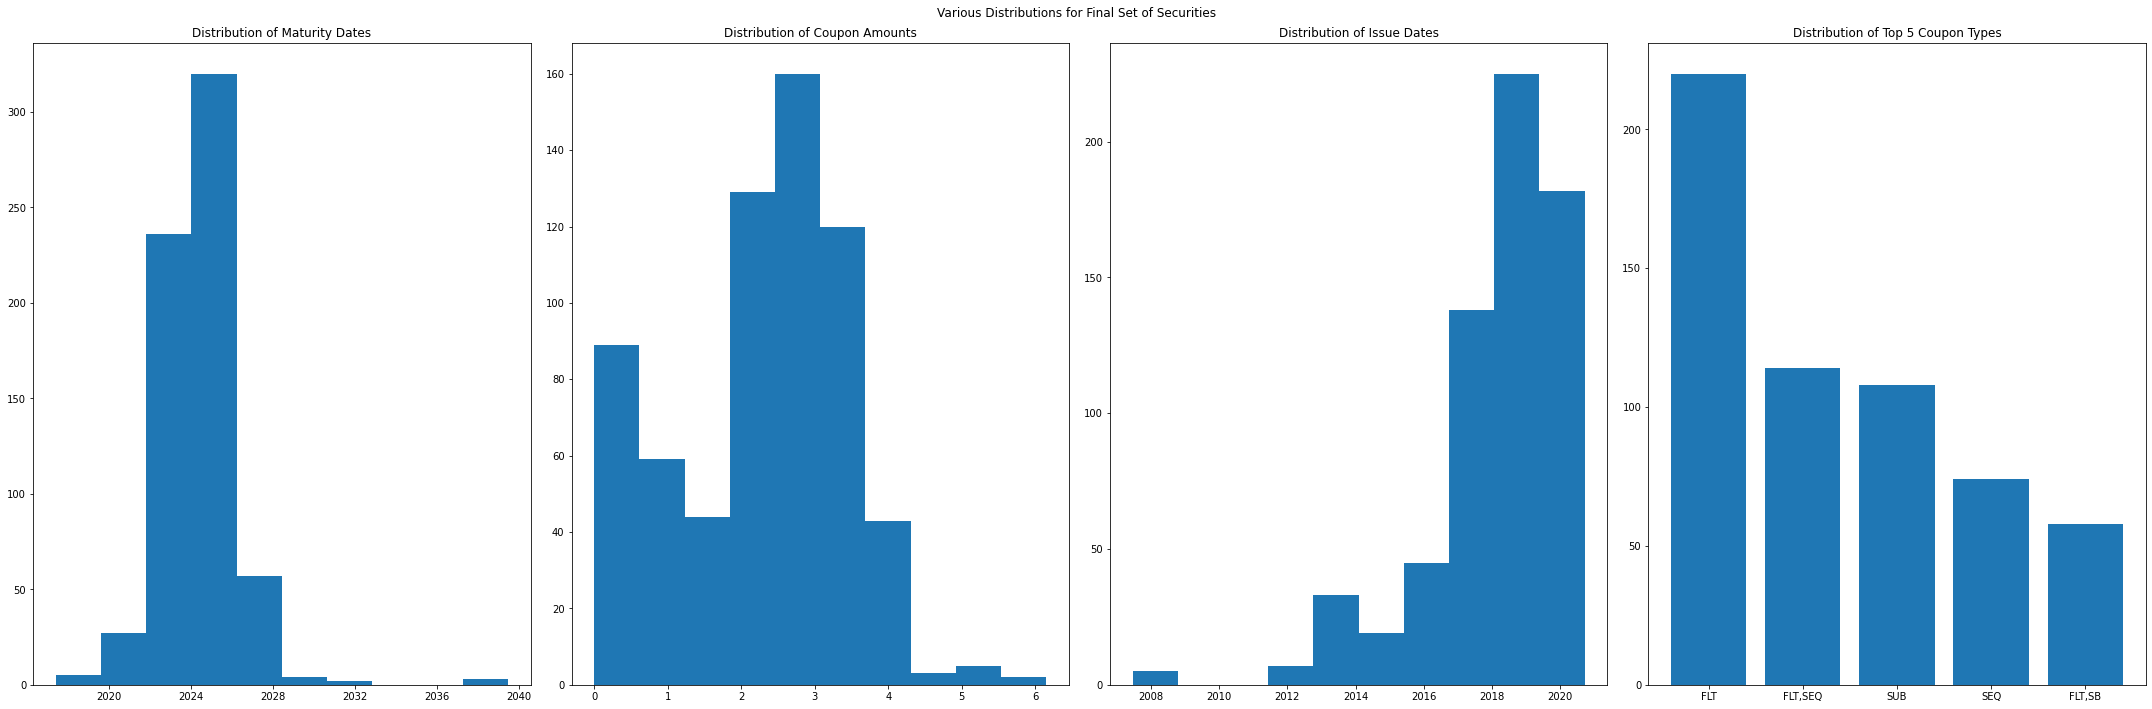

In [437]:
fig, axes=plt.subplots(ncols=4, figsize=(30,10))

axes[0].hist(df3['Maturity'])
axes[0].set_title('Distribution of Maturity Dates')


axes[1].hist(df3['Coupon'])
axes[1].set_title('Distribution of Coupon Amounts')


axes[2].hist(df3['Issued'])
axes[2].set_title('Distribution of Issue Dates')

axes[3].bar(df3['Type'].unique()[:5], df3['Type'].value_counts()[:5])
axes[3].set_title('Distribution of Top 5 Coupon Types')

fig.suptitle('Various Distributions for Final Set of Securities')
plt.tight_layout()


In [450]:
df3.dtypes

CF                                    object
Ticker                                object
Series                                object
Class                                 object
Coupon                                object
Maturity                      datetime64[ns]
Original Amount                       object
Factor                                object
Private                               object
Type                                  object
Country                               object
Currency                              object
Issued                        datetime64[ns]
Sub Sector                            object
SSA                                   object
Issuer Name                           object
CUSIP                                 object
Security Name                         object
Mortgage Original Amount             float64
Cpn                                  float64
Is Floater                            object
Is Mortgage Paid Off                  object
TRACE Elig

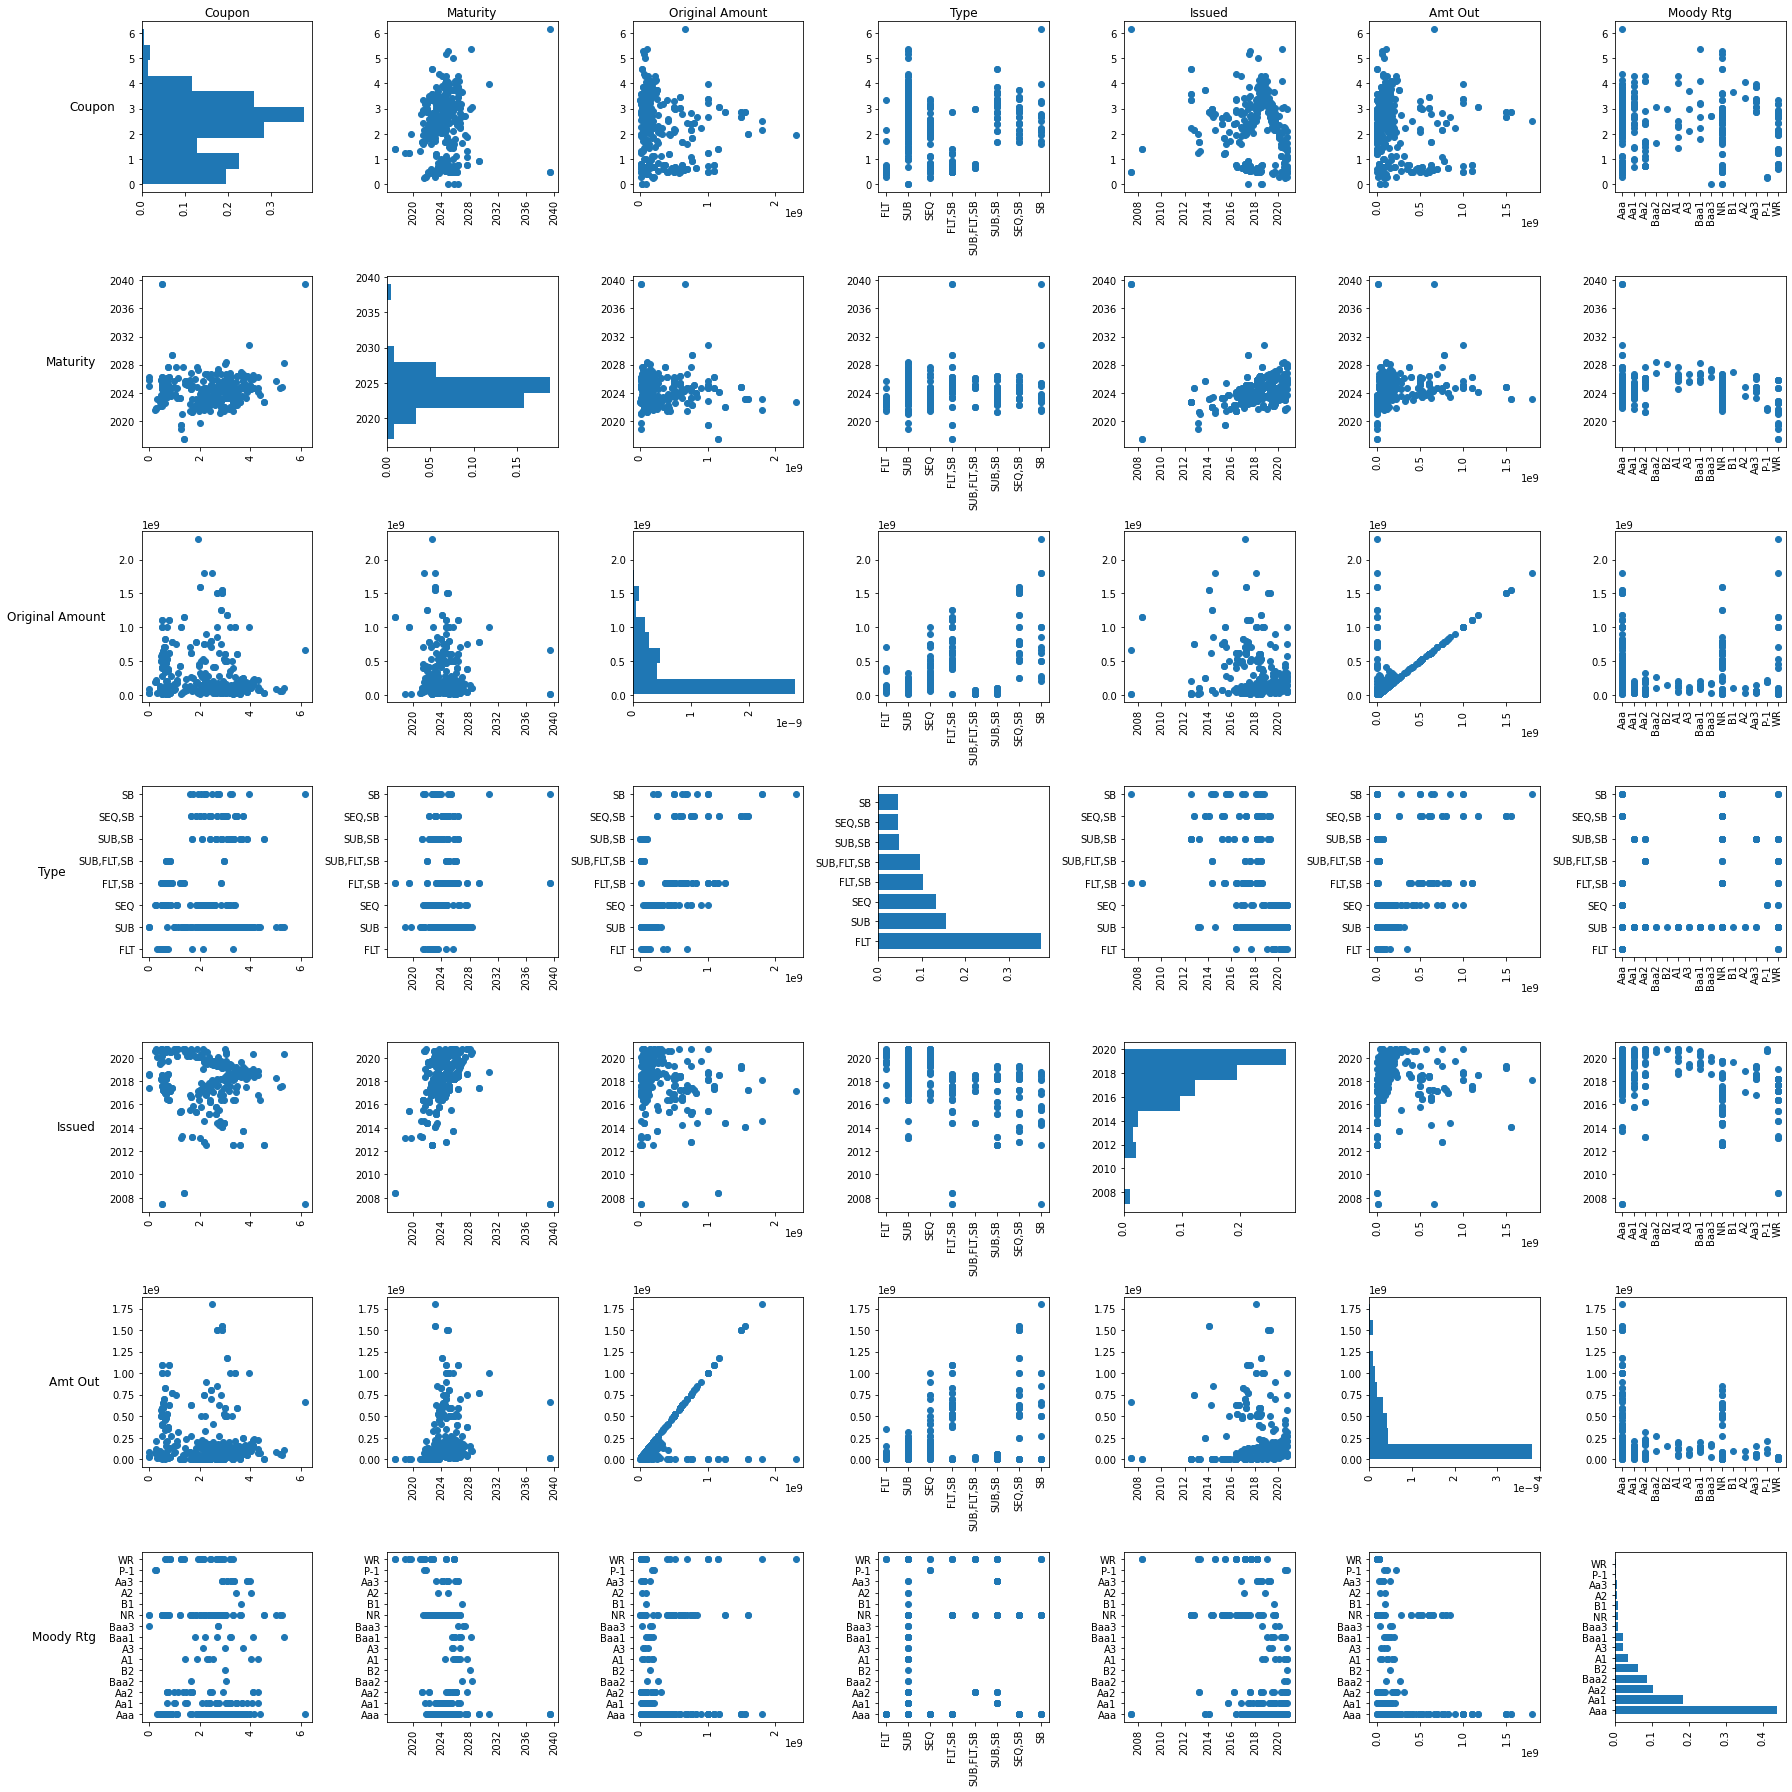

In [564]:
cols=['Coupon', 'Maturity', 'Original Amount', 'Type', 'Issued', 'Amt Out', 'Moody Rtg']

fig, axes = plt.subplots(ncols=len(cols), nrows=len(cols), figsize=(25,25))


for j,i in enumerate(cols):
    for l, k in enumerate(cols):
        if j==l:
            if type(df3[i][~df3['Moody Rtg'].isna()][0])==str:
                axes[j,l].barh(df3[i][~df3['Moody Rtg'].isna()].unique(), df3[i][~df3['Moody Rtg'].isna()].value_counts()/np.sum(df3[i][~df3['Moody Rtg'].isna()].value_counts()), linewidth=0)
            elif type(df3[i][~df3['Moody Rtg'].isna()][0])==pd.Timestamp:
                axes[j,l].hist(df3[i][~df3['Moody Rtg'].isna()].dt.year, orientation='horizontal', density=True)
            else:
                axes[j,l].hist(df3[i][~df3['Moody Rtg'].isna()], orientation='horizontal', density=True)

        else:
            axes[j,l].scatter(df3[k][~df3['Moody Rtg'].isna()], df3[i][~df3['Moody Rtg'].isna()])
                
        
        axes[j,l].tick_params(axis='x', labelrotation=90)
        axes[j,l].autoscale()
          
            

            
pad=5
for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], cols):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
    
     
fig.tight_layout()


In [603]:
LAATTRUU: pd.DataFrame = pd.read_excel(data_directory + "/LAATTRUU.xlsx") # Auto ABS Index
LAATTRUU.set_index('Date', inplace=True)

LACCTRUU: pd.DataFrame = pd.read_excel(data_directory + "/LACCTRUU.xlsx") # Card ABS Index
LACCTRUU.set_index('Date', inplace=True)

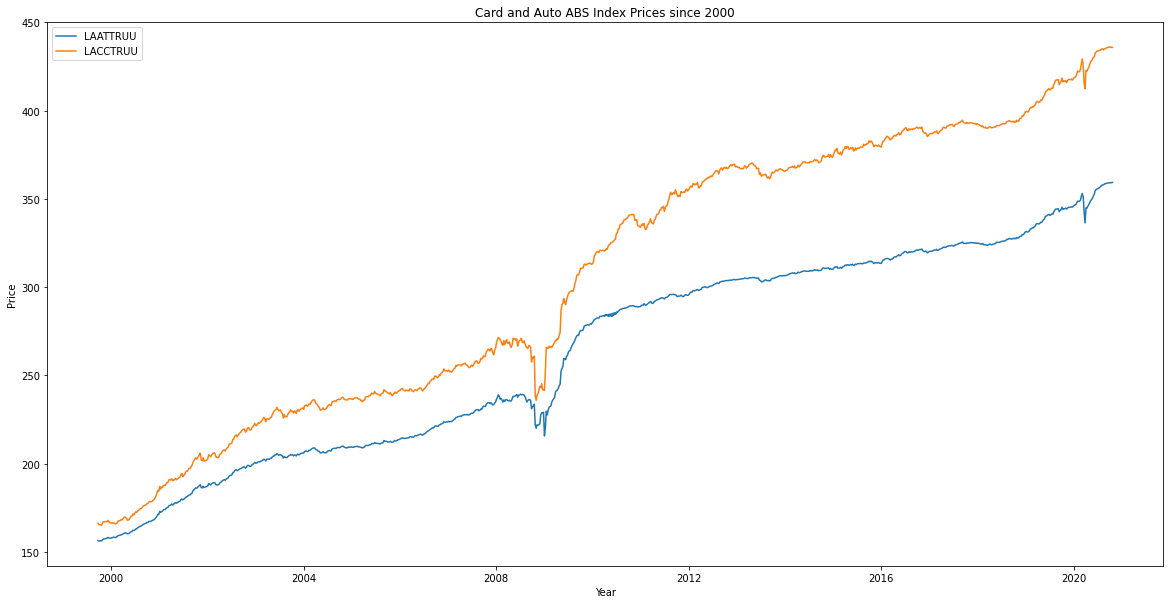

In [610]:
fig = plt.figure(figsize=(20,10))

plt.plot(LAATTRUU, label='LAATTRUU')
plt.plot(LACCTRUU, label='LACCTRUU')

plt.legend()

plt.ylabel('Price')
plt.xlabel('Year')

plt.title('Card and Auto ABS Index Prices since 2000')

_=plt.show()

In [700]:
traceCategories=['CARD', 'AUTO', 'CONSUMER']

traceIssuanceDFs: dict = {}
    
for i in traceCategories:
    df: pd.DataFrame = pd.read_excel(data_directory + f"/ABS TRACE ISSUANCE {i}.xlsx")
    df['Category']=i
    traceIssuanceDFs[f"{i}"] = df
    
    
traceIssuances: pd.DataFrame=pd.concat([traceIssuanceDFs[i] for i in traceIssuanceDFs])
traceIssuances.reset_index(inplace=True)
traceIssuances.drop('index', inplace=True, axis=1)


In [835]:
traceIssuances['Delinquency Rate 60+ Days'].replace(float("nan"), 0,inplace=True)
traceIssuances['Delinquency Rate 90+ Days'].replace(float("nan"), 0,inplace=True)

traceIssuances=traceIssuances[(traceIssuances['Issue Date']!="#N/A Field Not Applicable") & (traceIssuances['Issue Date'] !=  "#N/A Review")]
traceIssuances=traceIssuances[(traceIssuances['Maturity']!="#N/A Field Not Applicable") & (traceIssuances['Maturity'] !=  "#N/A Review")]
traceIssuances=traceIssuances[(traceIssuances['Next Call Date']!="#N/A Field Not Applicable") & (traceIssuances['Next Call Date'] !=  "#N/A Review")]
traceIssuances=traceIssuances[(traceIssuances['Next Coupon Date']!="#N/A Field Not Applicable") & (traceIssuances['Next Coupon Date'] !=  "#N/A Review")]

traceIssuances.dropna(subset=['Mid Price'], inplace=True)

traceIssuances['Issue Date']=pd.to_datetime(traceIssuances['Issue Date'])
traceIssuances['Maturity']=pd.to_datetime(traceIssuances['Maturity'])
traceIssuances['Next Call Date']=pd.to_datetime(traceIssuances['Next Call Date'])
traceIssuances['Next Coupon Date']=pd.to_datetime(traceIssuances['Next Coupon Date'])

traceIssuances['isCallable']=traceIssuances['Next Call Date'].isna()
traceIssuances['isCallable'].replace(False, 1, inplace=True)
traceIssuances['isCallable'].replace(True, 0, inplace=True)

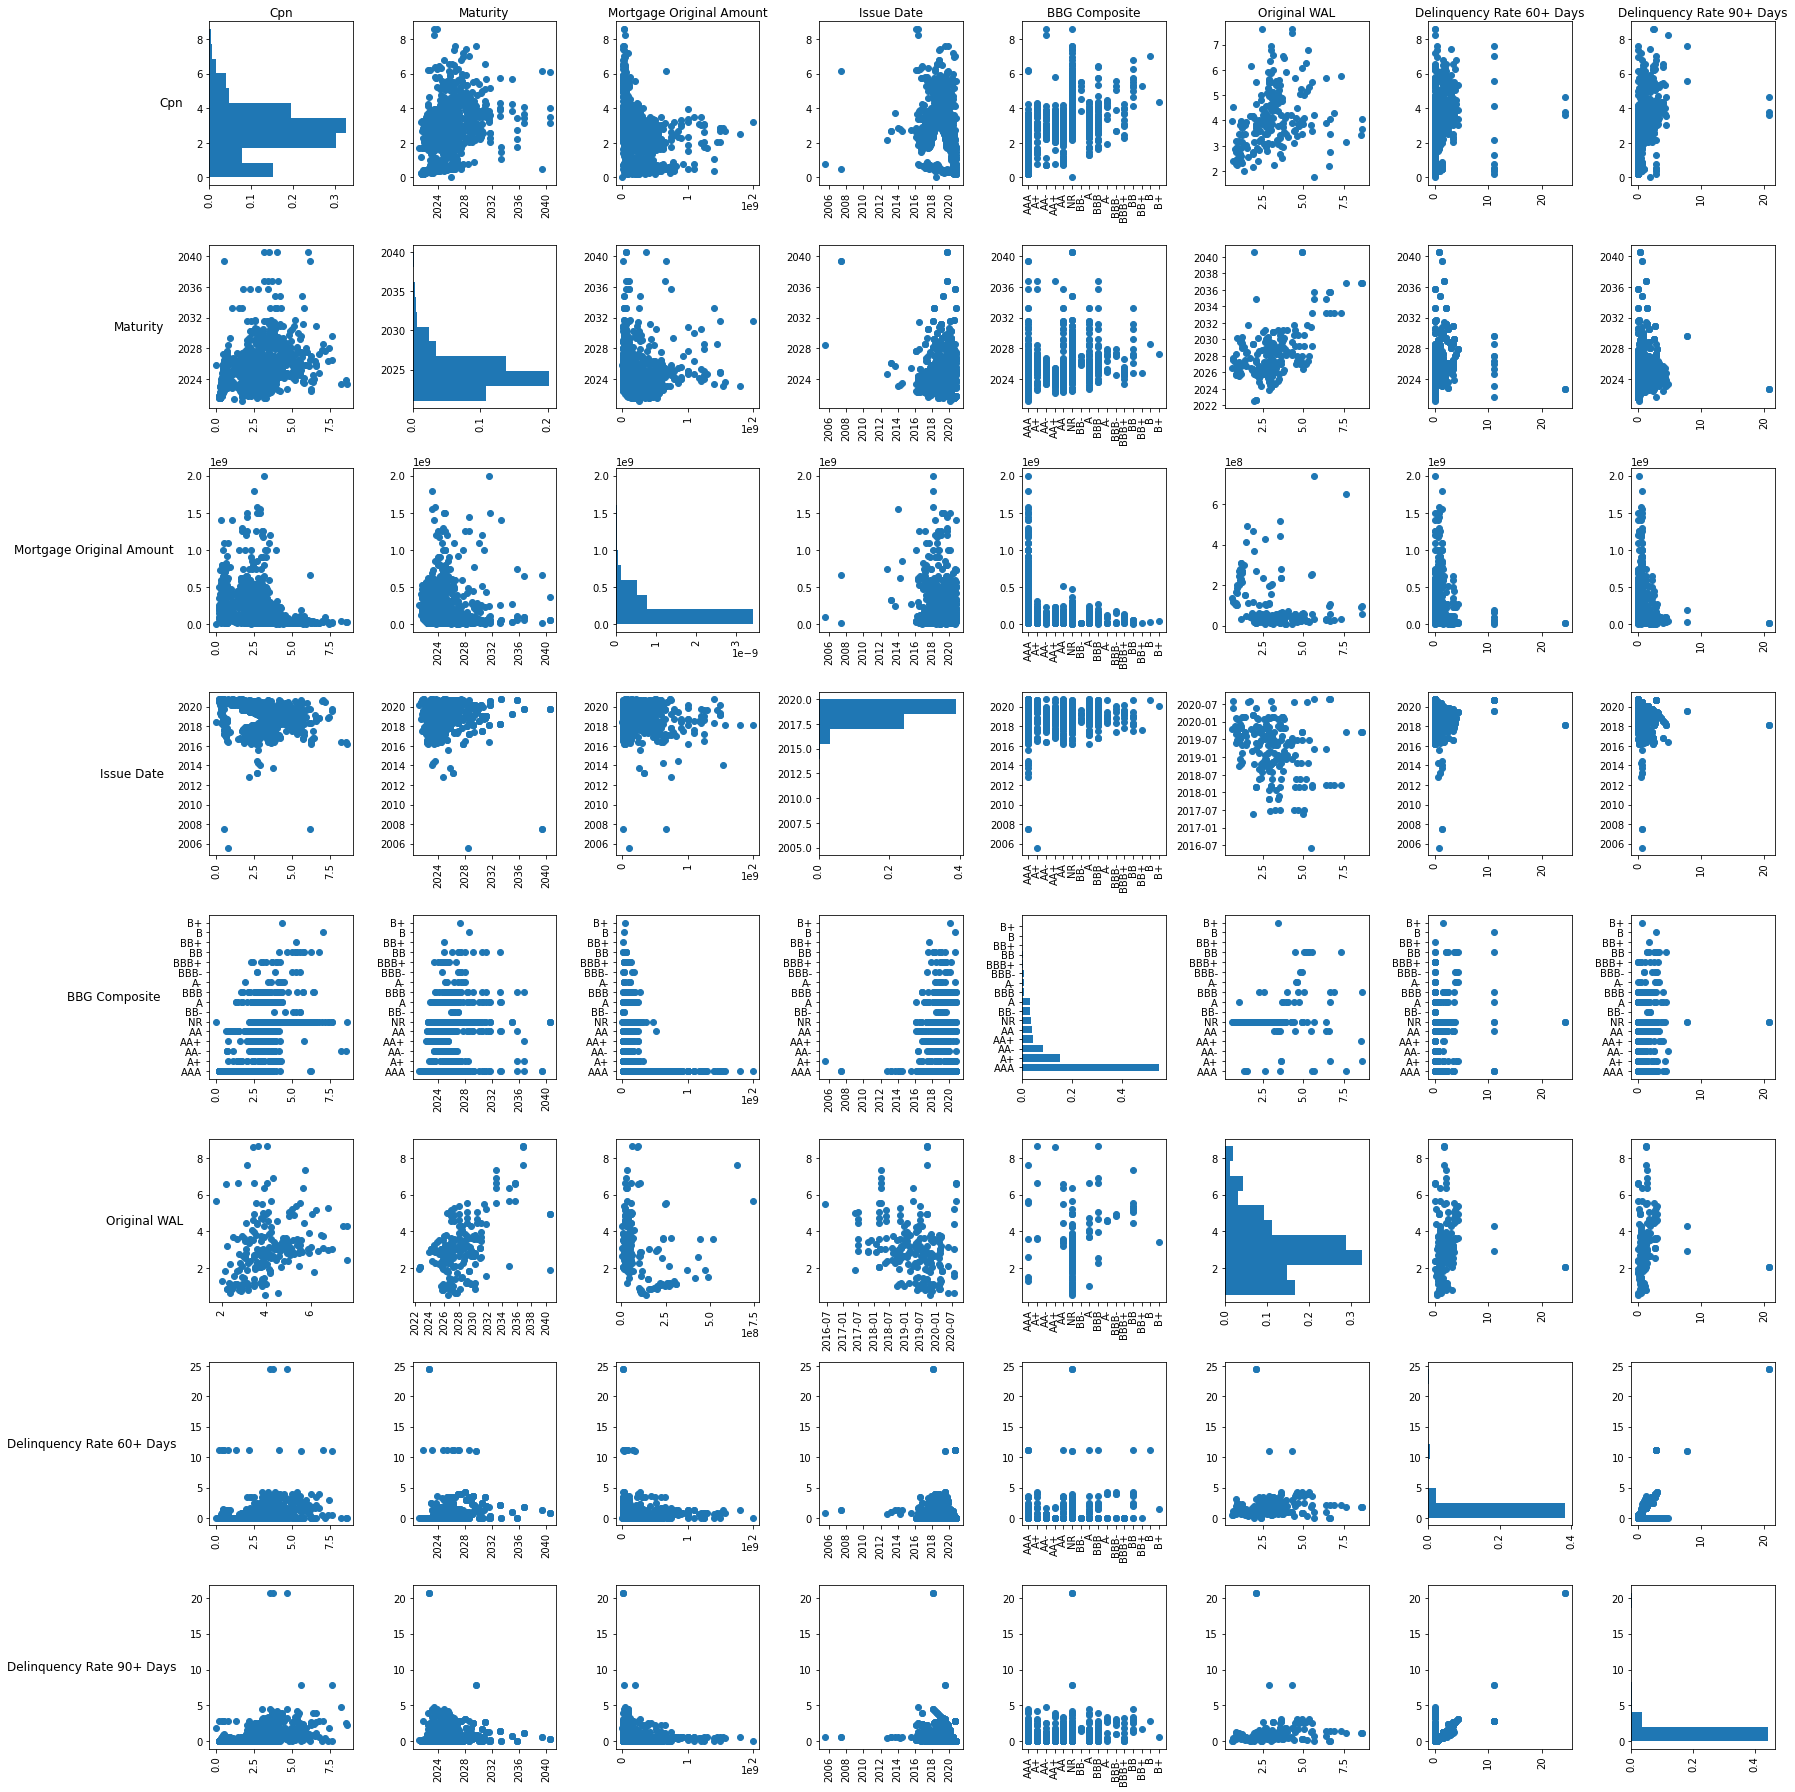

In [774]:
cols=['Cpn', 'Maturity', 'Mortgage Original Amount', 'Issue Date', 'BBG Composite', 'Original WAL','Delinquency Rate 60+ Days', 'Delinquency Rate 90+ Days']

fig, axes = plt.subplots(ncols=len(cols), nrows=len(cols), figsize=(25,25))


for j,i in enumerate(cols):
    for l, k in enumerate(cols):
        if j==l:
            if type(traceIssuances[i][0])==str or type(traceIssuances[i][0])==np.bool_:
                axes[j,l].barh(traceIssuances[i].unique(), traceIssuances[i].value_counts()/np.sum(traceIssuances[i].value_counts()), linewidth=0)
            elif type(traceIssuances[i][0])==pd.Timestamp:
                axes[j,l].hist(traceIssuances[i].dt.year, orientation='horizontal', density=True)
            else:
                axes[j,l].hist(traceIssuances[i], orientation='horizontal', density=True)
                

        else:
            axes[j,l].scatter(traceIssuances[k], traceIssuances[i])
                
        
        axes[j,l].tick_params(axis='x', labelrotation=90)
        axes[j,l].autoscale()
          
            

            
pad=5
for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], cols):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
    
     
fig.tight_layout()

In [775]:
traceIssuances.columns

Index(['Amt Out', 'BBG Composite', 'CUSIP', 'Cpn', 'Current WAL', 'Day Count',
       'Delinquency Rate 60+ Days', 'Delinquency Rate 90+ Days', 'Issue Date',
       'Issuer Name', 'Maturity', 'Mid Price', 'Mortgage Original Amount',
       'Next Call Date', 'Next Coupon Date', 'Original Maximum Loan Size',
       'Price at Issue', 'Security Name', 'Ticker', 'Category', 'Original WAL',
       'isCallable'],
      dtype='object')

In [776]:
from sklearn.linear_model import LinearRegression

X=pd.get_dummies(traceIssuances[['Delinquency Rate 60+ Days', 'Delinquency Rate 90+ Days', 'BBG Composite', 'isCallable']])
y=traceIssuances['Cpn']

model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [777]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Delinquency Rate 60+ Days,-2.170985e-01
Delinquency Rate 90+ Days,3.670438e-01
isCallable,2.220446e-16
BBG Composite_A,-8.799603e-01
BBG Composite_A+,-1.136018e+00
BBG Composite_A-,-3.245946e-01
BBG Composite_AA,-1.227337e+00
BBG Composite_AA+,-9.861141e-01
BBG Composite_AA-,-9.421585e-01
BBG Composite_AAA,-1.820558e+00


<AxesSubplot:xlabel='Cpn'>

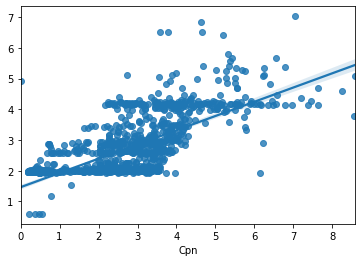

In [778]:
import seaborn as sns

t=model.predict(X)

sns.regplot(x=y, y=t, data=X)

In [836]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import datetime as dt

X_Cols=['Cpn', 'Amt Out', 'BBG Composite', 'Current WAL', 'Day Count',
       'Delinquency Rate 60+ Days', 'Delinquency Rate 90+ Days', 'Issue Date', 'Maturity', 'Mid Price', 'Mortgage Original Amount',
       'Next Call Date', 'Next Coupon Date', 'Original Maximum Loan Size',
       'Price at Issue', 'Category',
       'isCallable']

X=traceIssuances.copy()[X_Cols]
X.dropna(inplace=True)

X_idx=X.index

X['Next Call Date']=X['Next Call Date'].map(dt.datetime.toordinal)
X['Next Coupon Date']=X['Next Coupon Date'].map(dt.datetime.toordinal)
X['Issue Date']=X['Issue Date'].map(dt.datetime.toordinal)
X['Maturity']=X['Maturity'].map(dt.datetime.toordinal)





X=pd.get_dummies(X)
scaler=MinMaxScaler()
X=scaler.fit_transform(X)


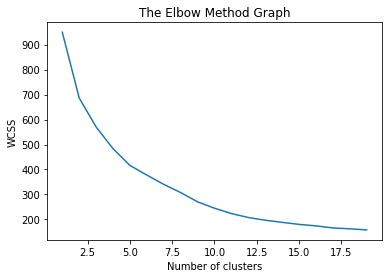

In [832]:
err: list = []

for i in range(1,20): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )

    kmeans.fit(X)

    err.append(kmeans.inertia_)

plt.plot(range(1,20),err)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

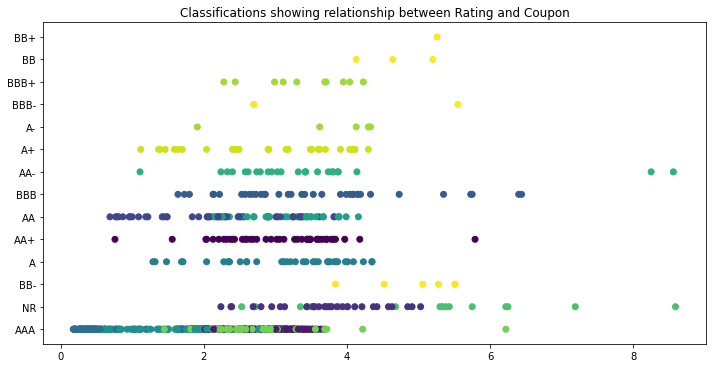

In [845]:
model=KMeans(n_clusters=15)

y_pred=model.fit_predict(X)

fig=plt.figure(figsize=(10,5))

plt.scatter(traceIssuances.loc[X_idx]['Cpn'], traceIssuances.loc[X_idx]['BBG Composite'], c=y_pred)
plt.tight_layout()

plt.title('Classifications showing relationship between Rating and Coupon')
_=plt.show()

## Question Answered (?)
From this, we can clearly see that there isn't a hardline from the data available that distinguishes AAA rated bonds from BB+ rated bonds since the groupings show multiple classes across ratings. This is interesting, and possibly indicates some sort of mispricing.